### Practice Project 3

### Wine-Quality 

In [30]:
#import necessay libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
# from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [4]:
wine = pd.read_csv('3.winequality-red.csv')

In [5]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


#### Observations
- Dataset dont have null values,All the data is of numeric type,There is no categorical variables in the dataset 

In [7]:
wine.shape

(1599, 12)

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

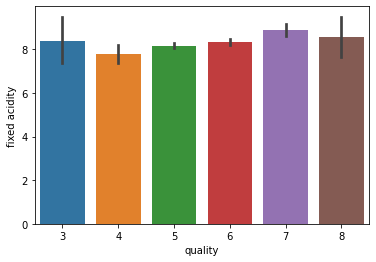

In [8]:
import seaborn
seaborn.barplot(x ='quality', y ='fixed acidity', data = wine)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

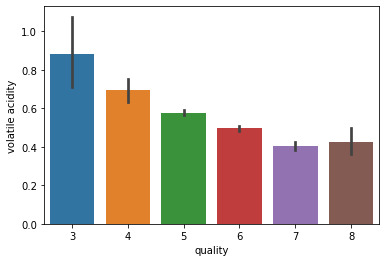

In [9]:
seaborn.barplot(x = 'quality', y = 'volatile acidity', data = wine)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

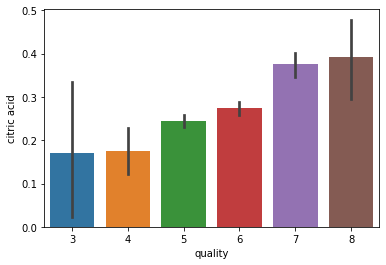

In [10]:
seaborn.barplot(x = 'quality', y = 'citric acid', data = wine)

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

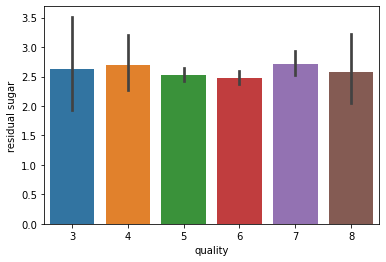

In [11]:
seaborn.barplot(x = 'quality', y = 'residual sugar', data = wine)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

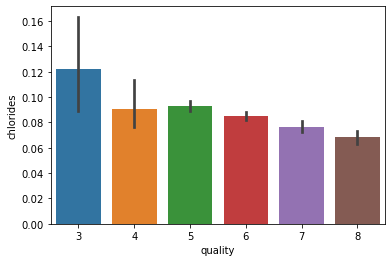

In [12]:
seaborn.barplot(x = 'quality', y = 'chlorides', data = wine)

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

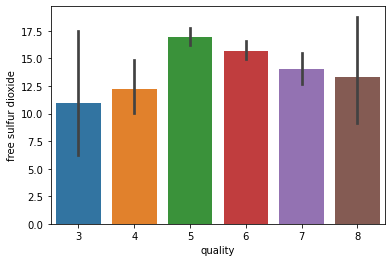

In [13]:
seaborn.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

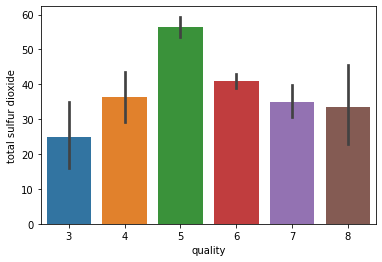

In [14]:
seaborn.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

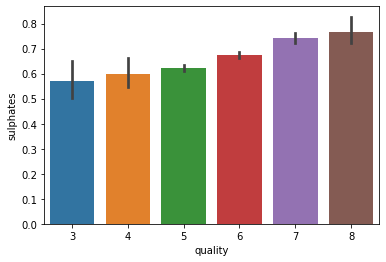

In [15]:
seaborn.barplot(x = 'quality', y = 'sulphates', data = wine)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

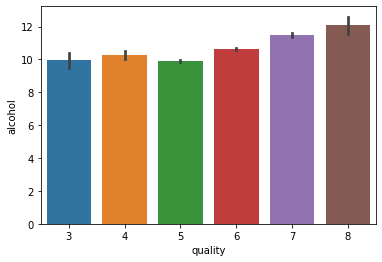

In [16]:
seaborn.barplot(x = 'quality', y = 'alcohol', data = wine)

#### Preprocessing of data

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

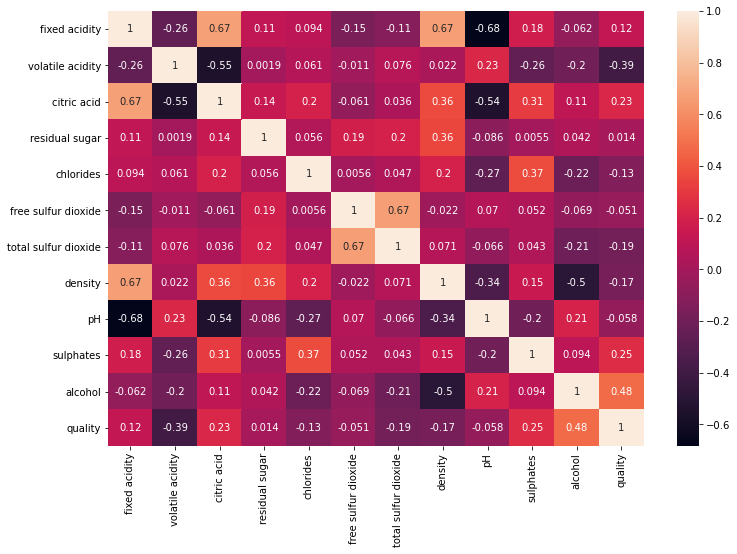

In [17]:
### correlation gives us relation between individual factors and which factor contributing more
correlation  = wine.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation,annot = True)       
cor = wine.corr()
cor['quality'].sort_values(ascending=False)

#### By visualising the data through heatmap, it is clear that Fixed acidity (13%), Citric acid(23%), Sulphates(21%), alcohol(36%) only contribute major part in quality 

In [18]:
### Making binary classificaion for the response variable.
### Dividing wine as good and bad by giving the limit for the quality
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
quality_range = (2,5,6,8)
quality_class = ['Worst','average','best']
wine['quality'] = pd.cut(wine['quality'], bins = quality_range, labels = quality_class)
LB = LabelEncoder()
LB_encoded = LB.fit_transform(wine['quality'])
print((LB.classes_))
print(LB_encoded)

['Worst' 'average' 'best']
[0 0 0 ... 1 0 1]


In [19]:
wine['quality'].max()
wine["quality"].value_counts()

Worst      744
average    638
best       217
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

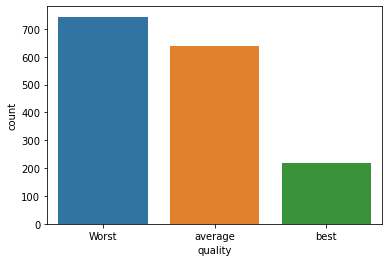

In [20]:
seaborn.countplot(wine["quality"])      

#### Splitting data for training 

In [21]:
from sklearn.model_selection import train_test_split
X = wine.drop('quality', axis = 1)
Y = wine['quality']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size = 0.3, random_state = 50)

In [22]:
def get_score(model, X_train, X_test, Y_train, Y_test):
    model.fit(X_train, Y_train)
    return model.score(X_test, Y_test)

In [23]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

#### Checking score with Logistic regression

In [24]:
import sklearn.linear_model as sk
learn = sk.LogisticRegression();          #initializing linear regression model
learn.fit(X_train,Y_train);               #training the linear regression model
y_predicted = learn.predict(X_test)
score = learn.score(X_test,Y_test);       #testing the linear regression model
print (score)

0.5875


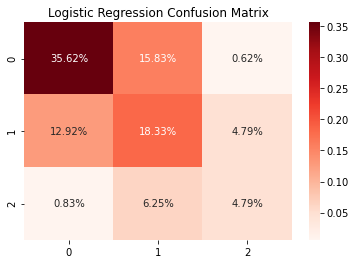

In [36]:
# confusion Maxtrix
cm1 = confusion_matrix(Y_test,y_predicted)
sns.heatmap(cm1/np.sum(cm1), annot = True, fmt=  '0.2%', cmap = 'Reds')
plt.title("Logistic Regression Confusion Matrix",fontsize=12)
plt.show()

#### Checking score with SVM

In [33]:
SVM = SVC()
SVM.fit(X_train,Y_train)
SVM.score(X_test,Y_test)

pred_SVM = SVM.predict(X_test)
score=SVM.score(X_test,Y_test)
print(classification_report(Y_test, pred_SVM))

              precision    recall  f1-score   support

       Worst       0.72      0.72      0.72       250
     average       0.52      0.57      0.54       173
        best       0.56      0.39      0.46        57

    accuracy                           0.63       480
   macro avg       0.60      0.56      0.57       480
weighted avg       0.63      0.63      0.63       480



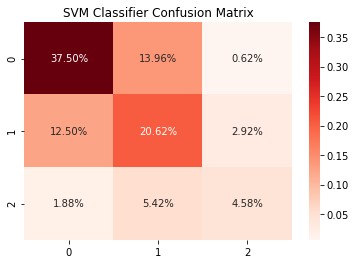

In [35]:
# confusion Maxtrix
cm2 = confusion_matrix(Y_test, pred_SVM)
sns.heatmap(cm2/np.sum(cm2), annot = True, fmt=  '0.2%', cmap = 'Reds')
plt.title("SVM Classifier Confusion Matrix",fontsize=12)
plt.show()

#### Checking score with Random Forest 

In [26]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train,Y_train)
rf.score(X_test,Y_test)

0.725

#### Random Forest Classifier

In [27]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, Y_train)
pred_rfc = rfc.predict(X_test)
score=rfc.score(X_test,Y_test)
print(classification_report(Y_test, pred_rfc))

              precision    recall  f1-score   support

       Worst       0.85      0.80      0.82       250
     average       0.65      0.73      0.68       173
        best       0.66      0.58      0.62        57

    accuracy                           0.75       480
   macro avg       0.72      0.70      0.71       480
weighted avg       0.75      0.75      0.75       480



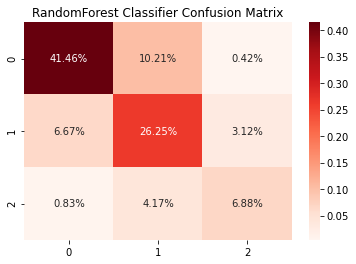

In [31]:
cm3 = confusion_matrix(Y_test, pred_rfc)
sns.heatmap(cm3/np.sum(cm3), annot = True, fmt=  '0.2%', cmap = 'Reds')
plt.title("RandomForest Classifier Confusion Matrix",fontsize=12)
plt.show()